# Libs

In [79]:
from google.colab import drive
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!wget -P bedops/ https://github.com/bedops/bedops/releases/download/v2.4.39/bedops_linux_x86_64-v2.4.39.tar.bz2
!tar jxvf bedops/bedops_linux_x86_64-v2.4.39.tar.bz2 -C bedops/

# Parameters

## Data Parameters

In [94]:
# Google Drive backup 
USE_GOOGLE_DRIVE_BACKUP = True
GOOGLE_DRIVE_PATH = '/content/drive'
DATA_FOLDER = 'data/'
GOOGLE_DRIVE_DATA_FOLDER = '/MyDrive/Биоинформатика/ВШЭ/Статья/data/'

# hg19 link
HG19_LINK = 'ftp://hgdownload.cse.ucsc.edu/goldenPath/hg19/bigZips/hg19.fa.gz'

# G4 bed links
G4_BED_LINKS = {
    'g4seq': ['ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE63nnn/GSE63874/suppl/GSE63874_Na_K_plus_hits_intersect.bed.gz',
              'ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE63nnn/GSE63874/suppl/GSE63874_Na_K_minus_hits_intersect.bed.gz'
              ],
    'g4chip': ['https://ftp.ncbi.nlm.nih.gov/geo/series/GSE99nnn/GSE99205/suppl/GSE99205_common_HaCaT_G4_ChIP_peaks_RNase_treated.bed.gz']
}

# Data Preprocess (choose it based on bed file intervals length)
G4_NORM_LEN = {
    'g4seq': 512,
    'g4chip': 1024
} 

if USE_GOOGLE_DRIVE_BACKUP:
    drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Model Parameters

# Data Preparation

## Data Downloading

In [58]:
# Check if file already exist
def check_file_exist(file_path):
    exist = False
    if os.path.isfile(file_path):
        exist = True
    return exist

# Download hg19 data
def download_hg19_data(data_folder, use_google_drive_backup=False, google_drive_data_path=None):
    if check_file_exist(data_folder + 'hg19/hg19.fa'):
        print("HG19 FILE ALREADY EXIST")
    elif check_file_exist(data_folder + 'hg19/hg19.fa.gz'):
        print("UNZIP HG19 FILE")
        !gzip -d -k $data_folder"hg19/hg19.fa.gz"
    elif use_google_drive_backup and check_file_exist(google_drive_data_path + 'hg19/hg19.fa.gz'):
        print("COPY HG19 FROM GOOGLE DRIVE")
        !cp -R $google_drive_data_path"hg19/" $data_folder"hg19/"
    else:
        !wget --timestamping $HG19_LINK -P $data_folder"hg19/"
        !cp -R $data_folder"hg19/" $google_drive_data_path 

# Download g4 data with specific data type (eg. g4seq, g4chip, etc.)
def download_g4_data(data_type, data_folder, use_google_drive_backup=False, google_drive_data_path=None):
    for file_link in G4_BED_LINKS[data_type]:
        file_name = file_link.split('/')[-1]
        file_name_unzip = file_name.rsplit('.', 1)[0]
        
        if check_file_exist(data_folder + f'{data_type}/{file_name_unzip}'):
            print(f"{file_name_unzip} FILE ALREADY EXIST")
        elif check_file_exist(data_folder + f'{data_type}/{file_name}'):
            print(f"UNZIP {file_name} FILE")
            !gzip -d -k $data_folder$data_type"/"$file_name
        elif use_google_drive_backup and check_file_exist(google_drive_data_path + f'{data_type}/{file_name}'):
            print(f"COPY {file_name} FROM GOOGLE DRIVE")
            !cp -R $google_drive_data_path$data_type"/" $data_folder$data_type"/"
        else:
            !wget --timestamping $file_link -P $data_folder$data_type"/"
            !cp -R $data_folder$data_type"/" $google_drive_data_path 
    
    if check_file_exist(data_folder + f'{data_type}/{data_type}.bed'):
        print(f"{data_type}.bed FILE ALREADY EXIST")
    elif len(G4_BED_LINKS[data_type]) > 1:
        print(f"CONCAT .bed FILES FOR {data_type}")
        file_names_unzip = [data_folder + data_type + "/" + file_link.split('/')[-1].rsplit('.', 1)[0] 
                            for file_link in G4_BED_LINKS[data_type]]
        file_names_unzip_str = ' '.join(file_names_unzip)
        !bedops/bin/bedops --everything $file_names_unzip_str > $data_folder$data_type"/"$data_type".bed"
    else:
        print(f"RENAME .bed FILE FOR {data_type}")
        file_name = G4_BED_LINKS[data_type][0].split('/')[-1]
        file_name_unzip = file_name.rsplit('.', 1)[0]
        !cp $data_folder$data_type"/"$file_name_unzip $data_folder$data_type"/"$data_type".bed"


# Download all g4 data from G4_BED_LINKS dict
def download_all_g4_data(data_folder, use_google_drive_backup=False, google_drive_data_path=None):
    data_types = list(G4_BED_LINKS.keys())
    for data_type in data_types:
        download_g4_data(data_type, data_folder, use_google_drive_backup, google_drive_data_path)

# Download all data and merge bed files into one
def download_data(data_folder=DATA_FOLDER, use_google_drive_backup=USE_GOOGLE_DRIVE_BACKUP, google_drive_data_path=GOOGLE_DRIVE_PATH + GOOGLE_DRIVE_DATA_FOLDER):
    print('DOWNLOAD DATA')

    if data_folder is None:
        raise Exception('Data Folder Path Not Set')
    elif use_google_drive_backup and google_drive_data_path is None:
        raise Exception('No Google Drive Path')

    print('DOWNLOAD HG19')
    download_hg19_data(data_folder, use_google_drive_backup, google_drive_data_path)
    print('DOWNLOAD HG19 FINISH')

    print('DOWNLOAD G4 DATA')
    download_all_g4_data(data_folder, use_google_drive_backup, google_drive_data_path)
    print('DOWNLOAD G4 DATA FINISH')

    print('DOWNLOAD DATA FINISH')

In [90]:
# download all the data
download_data()

DOWNLOAD DATA
DOWNLOAD HG19
HG19 FILE ALREADY EXIST
DOWNLOAD HG19 FINISH
DOWNLOAD G4 DATA
GSE63874_Na_K_plus_hits_intersect.bed FILE ALREADY EXIST
GSE63874_Na_K_minus_hits_intersect.bed FILE ALREADY EXIST
g4seq.bed FILE ALREADY EXIST
GSE99205_common_HaCaT_G4_ChIP_peaks_RNase_treated.bed FILE ALREADY EXIST
g4chip.bed FILE ALREADY EXIST
DOWNLOAD G4 DATA FINISH
DOWNLOAD DATA FINISH


## Visualise data

In [91]:
def visualise_data():
    for data_type in G4_BED_LINKS.keys():
        print('-----------------------------------')
        print(f'SHOW G4 DATA FOR: {data_type}')

        g4df = pd.read_csv(f'{DATA_FOLDER}{data_type}/{data_type}.bed', sep='\t', header=None)
        g4df['len'] = g4df[2] - g4df[1]
        sns.distplot(g4df.len)
        plt.show()

        print('-----------------------------------')

-----------------------------------
SHOW G4 DATA FOR: g4seq


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


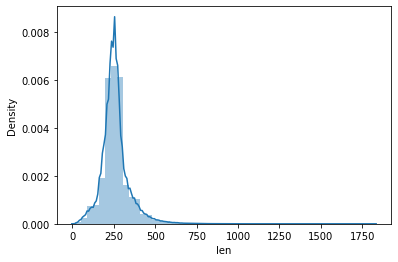

-----------------------------------
-----------------------------------
SHOW G4 DATA FOR: g4chip


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


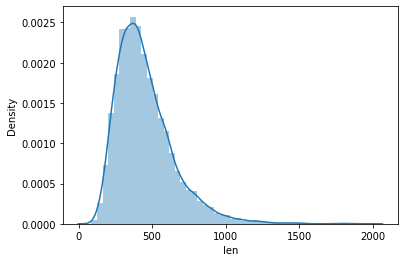

-----------------------------------


In [93]:
# visualise data
visualise_data()

Because of different qudruplex detection methods, we will use different lenth for bed intervals normalisation:

g4seq: 512

g4chip: 1024

## Data Preprocessing

In [ ]:
# Norm bed files to norm len
def norm_bed_files():
    for data_type in G4_BED_LINKS.keys():
         

def preprocess_data():
    pass

In [ ]:
# preprocess data
preprocess_data()